# Research Question
** Insert question here

In [18]:
!pip install pytrends
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
import requests
import numpy as np
import bs4
import datetime

# Data Collection Google Trends
To collect Google Trends data, we used the Pytrends API. Our goal was to collect data showing how much the keywords "corona" and "coronavirus" were searched for for in every country on every day since February 1st. To do this, we used the **insert git repo** to generate a Series of country codes (in ISO format, which is what). iterating over countries

In [ ]:
pytrend = TrendReq(hl='en-US', tz=360, retries=10, backoff_factor=0.5)

pd.set_option("display.max_rows", None, "display.max_columns", None)

country_code_data = pd.read_csv("country-codes.csv")
country_code_data = country_code_data.dropna(subset=['official_name_en'])
countries = country_code_data[["official_name_en", "ISO3166-1-Alpha-3", "ISO3166-1-Alpha-2"]]

kw_list = ['corona', 'coronavirus']
for ind in countries.index:
    time.sleep(5)
    pytrend.build_payload(
        kw_list=kw_list,
        geo=countries["ISO3166-1-Alpha-2"][ind],
        timeframe='2020-02-01 2020-10-06',
    )
    df_time = pytrend.interest_over_time()
    df_time = df_time.loc[:, df_time.columns != 'isPartial']
    df_time["country_code"] = countries["ISO3166-1-Alpha-3"][ind]
    df_time['country_name'] = countries["official_name_en"][ind]

    df_time.to_csv('google_trends_data.csv', mode='a', header=True)

# Data Cleaning Google Trends
** explaination 

In [26]:
trends_data = pd.read_csv("google_trends_data.csv")
trends_data["date"] = pd.to_datetime(trends_data["date"],format='%m/%d/%Y')
trends_data = trends_data.rename(columns = {"corona":"corona_searches", "corona virus":"corona_virus_searches", "country_code":"iso_code"})
trends_data.dtypes

date                     datetime64[ns]
corona_searches                   int64
corona_virus_searches             int64
iso_code                         object
country_name                     object
dtype: object

# Data Collection Corona Case Data
** Insert brief explaination of how we collected data here

# Data Cleaning Corona Case Data
** Insert plan / steps for data cleaning here

In [30]:
corona_data = pd.read_csv("covid-data.csv")
corona_data = corona_data[["iso_code","location","date","total_cases","new_cases","new_cases_smoothed","total_deaths","new_deaths","new_deaths_smoothed","total_cases_per_million","new_cases_per_million","new_cases_smoothed_per_million","total_deaths_per_million","new_deaths_per_million","new_deaths_smoothed_per_million","new_tests","total_tests","total_tests_per_thousand","new_tests_per_thousand","new_tests_smoothed","new_tests_smoothed_per_thousand"]]
corona_data["date"] = pd.to_datetime(corona_data["date"],format='%Y-%m-%d')
corona_data = corona_data.rename(columns = {"location":"country_name"})
corona_data.dtypes

iso_code                                   object
country_name                               object
date                               datetime64[ns]
total_cases                               float64
new_cases                                 float64
new_cases_smoothed                        float64
total_deaths                              float64
new_deaths                                float64
new_deaths_smoothed                       float64
total_cases_per_million                   float64
new_cases_per_million                     float64
new_cases_smoothed_per_million            float64
total_deaths_per_million                  float64
new_deaths_per_million                    float64
new_deaths_smoothed_per_million           float64
new_tests                                 float64
total_tests                               float64
total_tests_per_thousand                  float64
new_tests_per_thousand                    float64
new_tests_smoothed                        float64


# Data Description 
** Insert desciption here

# Data Limitations
** Insert data limitations here

# Exploratory data analysis
** Insert exploratory data analysis here

In [103]:
combined_data = pd.merge(trends_data, corona_data, on=['date','iso_code'], how='inner')
del combined_data["country_name_x"]
combined_data = combined_data.rename(columns = {"country_name_y":"country_name"})
combined_data

,date,corona_searches,corona_virus_searches,iso_code,country_name,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand
0,2020-02-01,8,11,AFG,Afghanistan,0.0,0.0,0.000,0.0,0.0,...,0.000,0.00,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-02,9,13,AFG,Afghanistan,0.0,0.0,0.000,0.0,0.0,...,0.000,0.00,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-03,3,8,AFG,Afghanistan,0.0,0.0,0.000,0.0,0.0,...,0.000,0.00,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-04,5,7,AFG,Afghanistan,0.0,0.0,0.000,0.0,0.0,...,0.000,0.00,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-05,3,10,AFG,Afghanistan,0.0,0.0,0.000,0.0,0.0,...,0.000,0.00,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44172,2020-09-30,2,3,ZWE,Zimbabwe,7837.0,21.0,18.000,228.0,0.0,...,1.211,15.34,0.0,0.019,467.0,119491.0,8.040,0.031,515.0,0.035
44173,2020-10-01,1,2,ZWE,Zimbabwe,7838.0,1.0,16.143,228.0,0.0,...,1.086,15.34,0.0,0.010,1039.0,120530.0,8.109,0.070,561.0,0.038
44174,2020-10-02,1,3,ZWE,Zimbabwe,7850.0,12.0,14.000,228.0,0.0,...,0.942,15.34,0.0,0.010,NaN,NaN,NaN,NaN,NaN,NaN
44175,2020-10-03,3,3,ZWE,Zimbabwe,7858.0,8.0,10.143,228.0,0.0,...,0.682,15.34,0.0,0.010,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'cases')

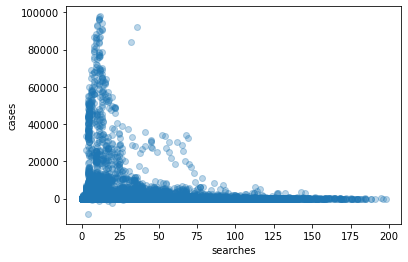

In [104]:
plt.scatter(combined_data["corona_searches"] +  combined_data["corona_virus_searches"], combined_data["new_cases"], alpha=0.3)
plt.xlabel("searches")
plt.ylabel("cases")

/opt/anaconda3/envs/info2950/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


country_name
Afghanistan       AxesSubplot(0.125,0.125;0.775x0.755)
Albania           AxesSubplot(0.125,0.125;0.775x0.755)
Algeria           AxesSubplot(0.125,0.125;0.775x0.755)
Andorra           AxesSubplot(0.125,0.125;0.775x0.755)
Angola            AxesSubplot(0.125,0.125;0.775x0.755)
                                  ...                 
Vietnam           AxesSubplot(0.125,0.125;0.775x0.755)
Western Sahara    AxesSubplot(0.125,0.125;0.775x0.755)
Yemen             AxesSubplot(0.125,0.125;0.775x0.755)
Zambia            AxesSubplot(0.125,0.125;0.775x0.755)
Zimbabwe          AxesSubplot(0.125,0.125;0.775x0.755)
Length: 205, dtype: object

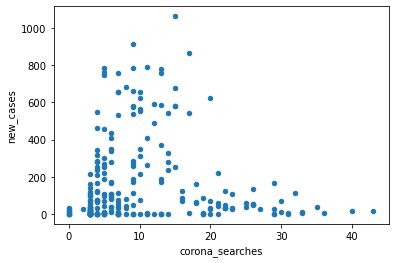

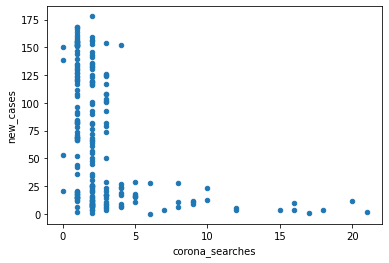

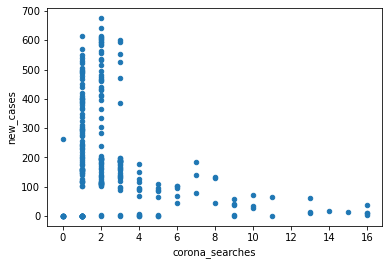

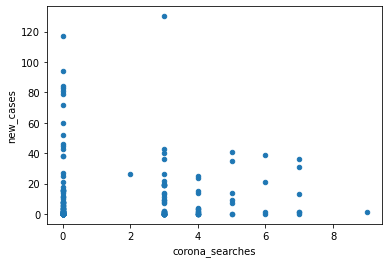

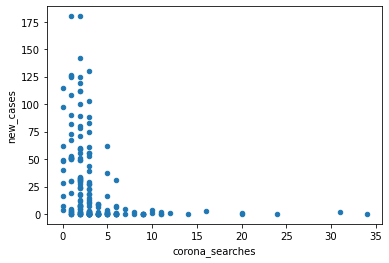

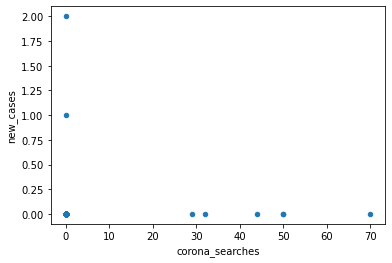

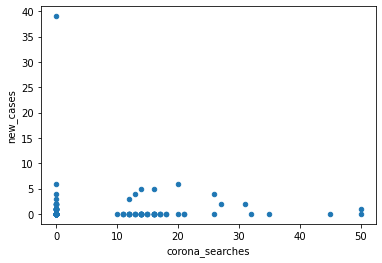

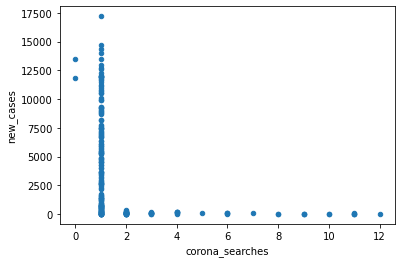

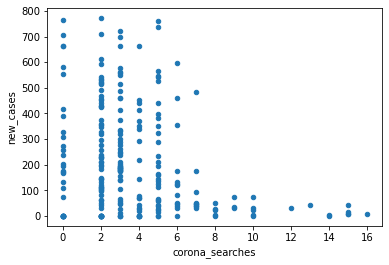

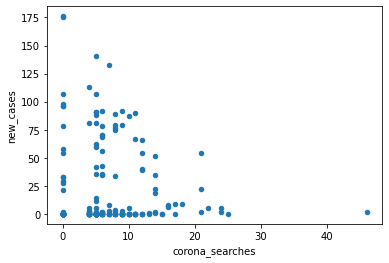

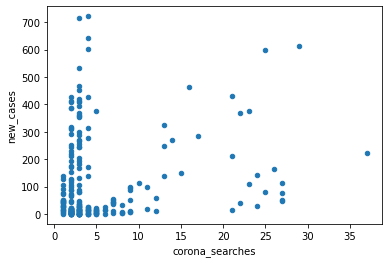

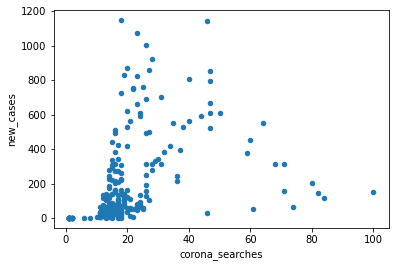

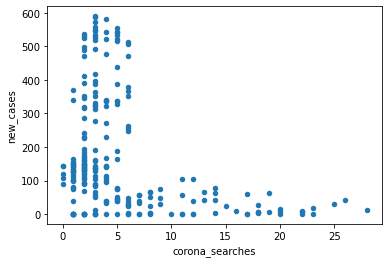

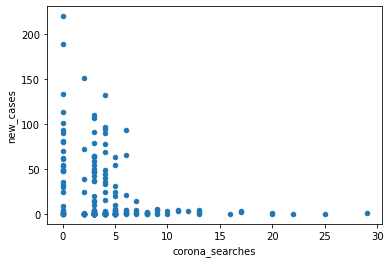

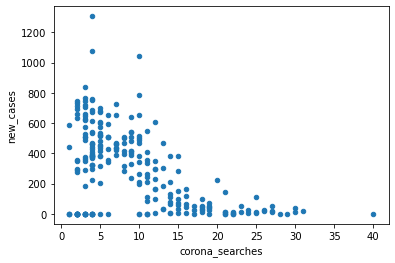

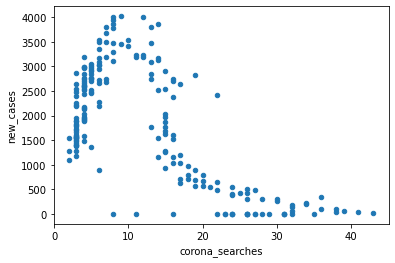

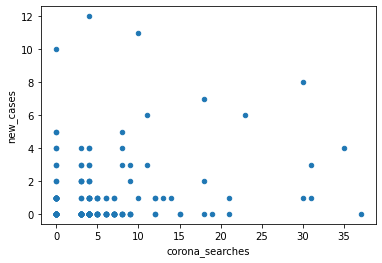

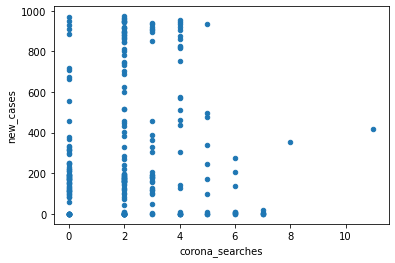

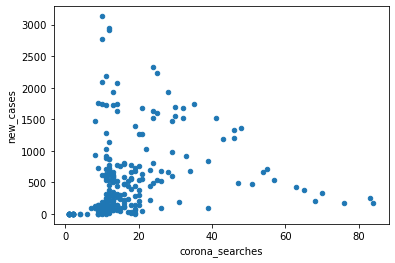

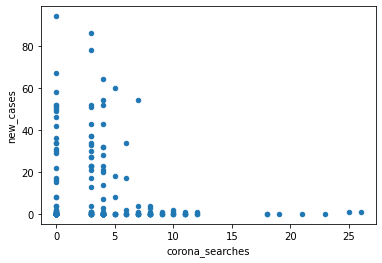

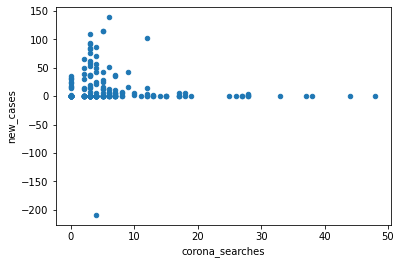

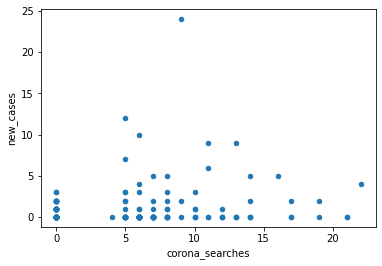

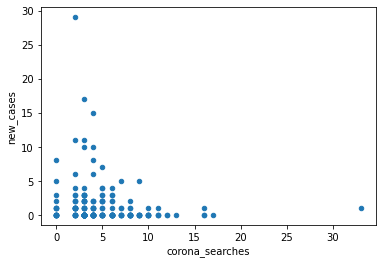

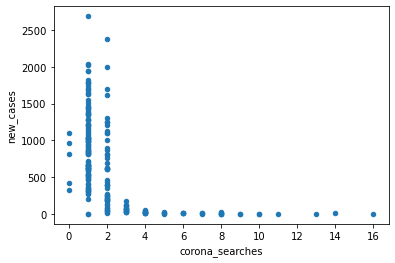

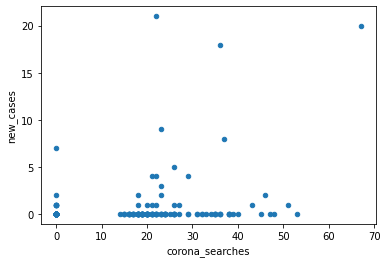

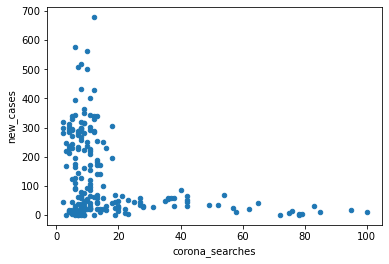

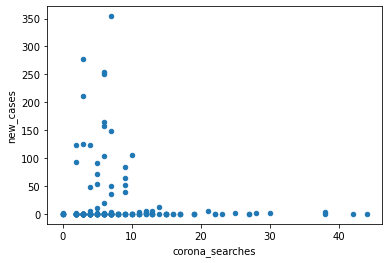

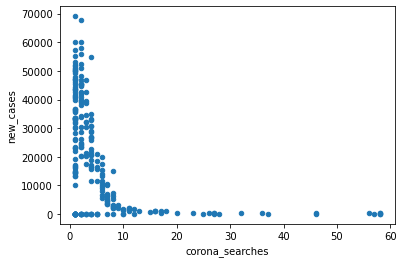

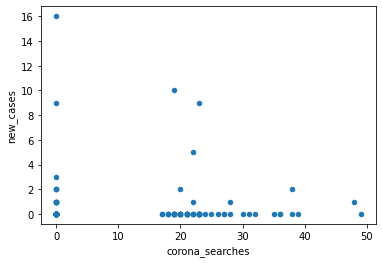

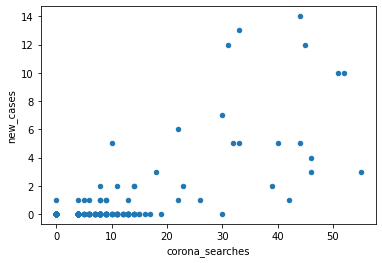

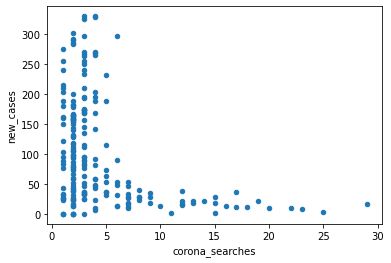

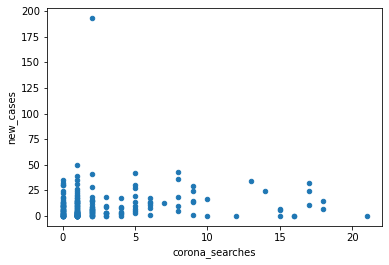

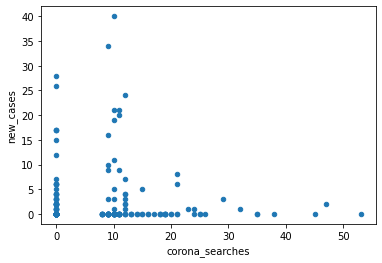

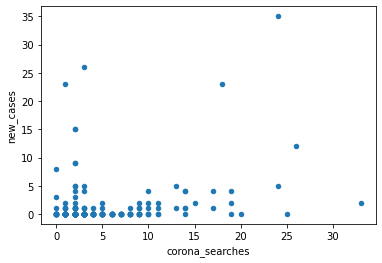

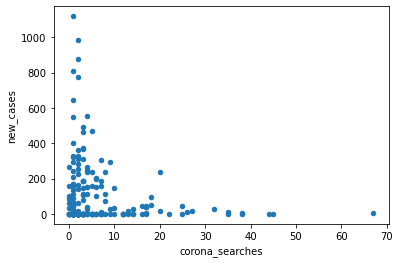

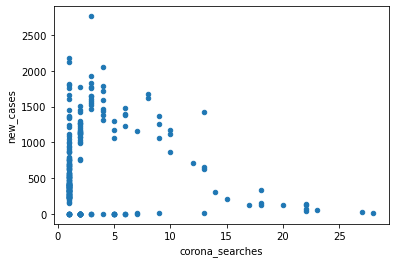

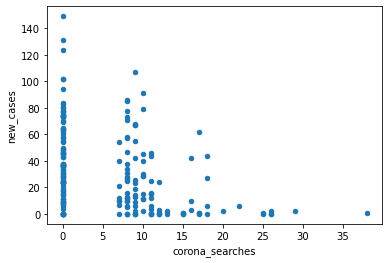

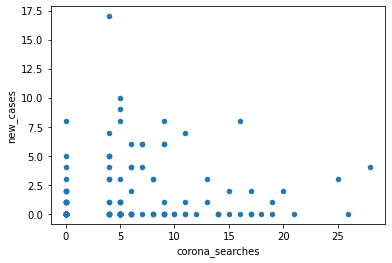

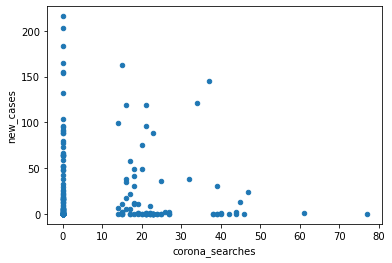

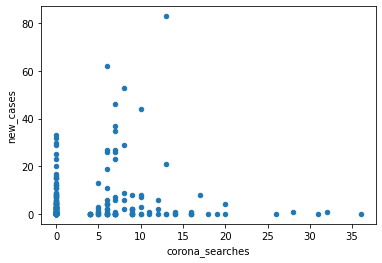

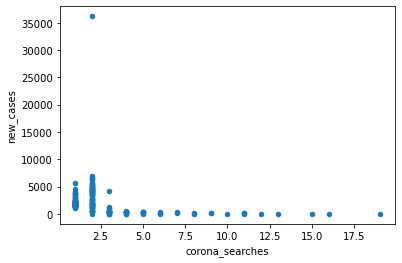

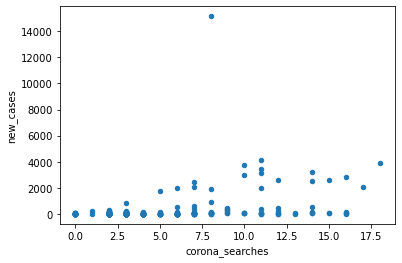

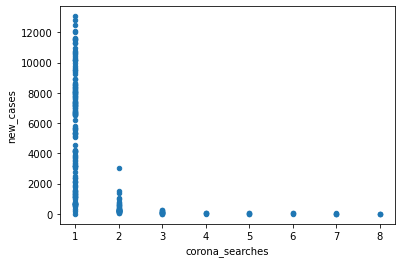

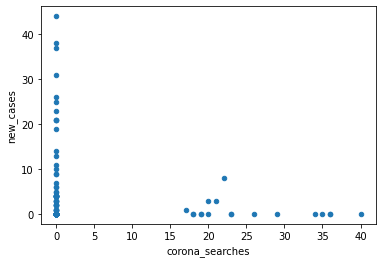

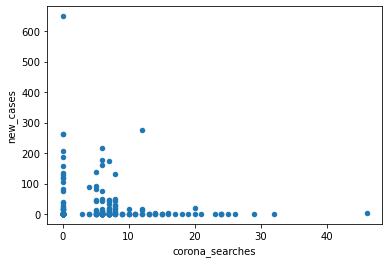

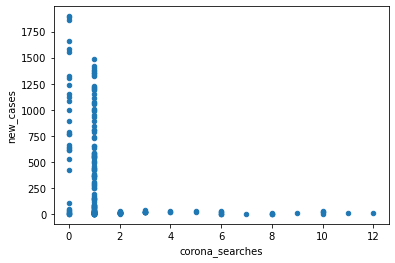

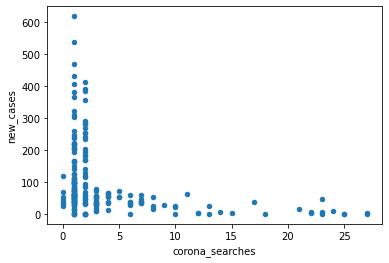

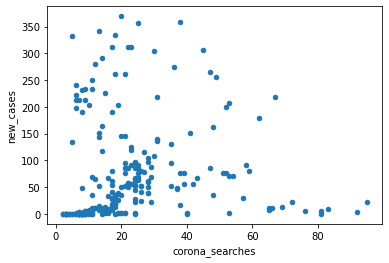

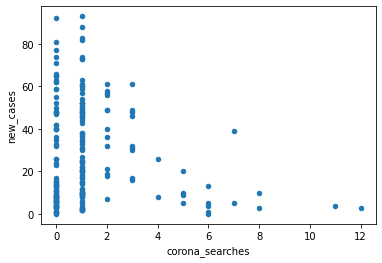

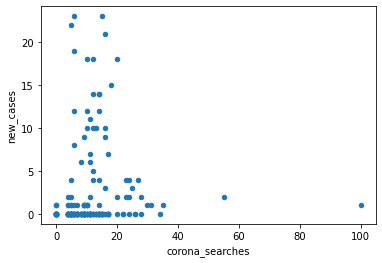

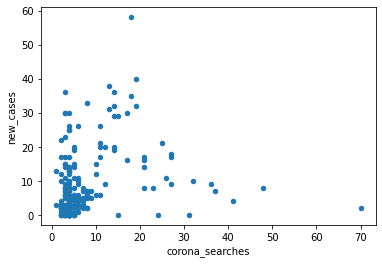

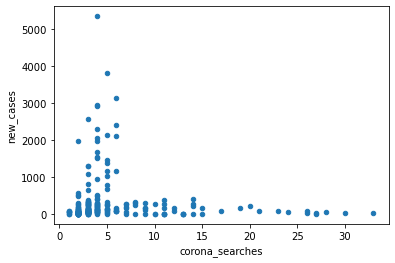

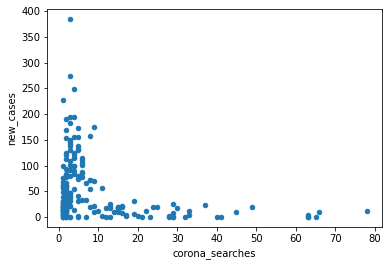

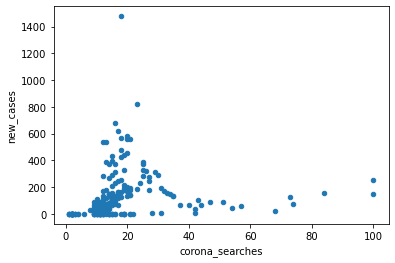

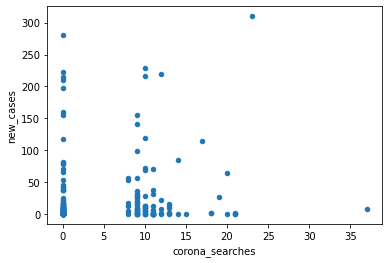

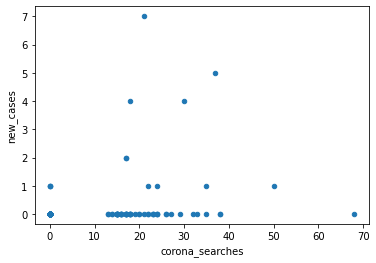

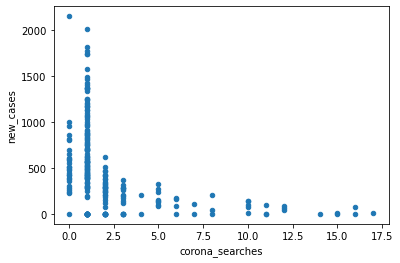

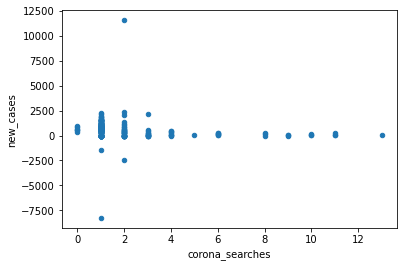

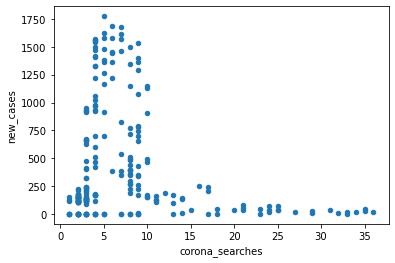

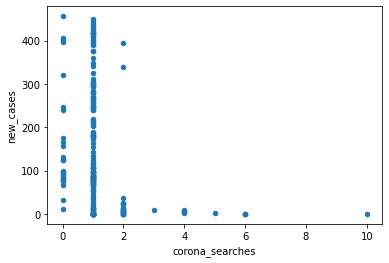

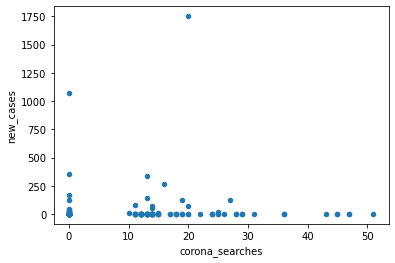

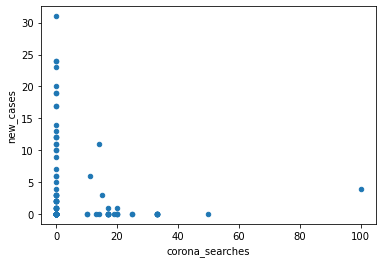

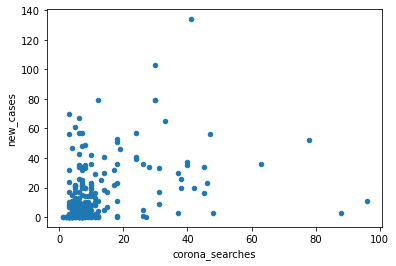

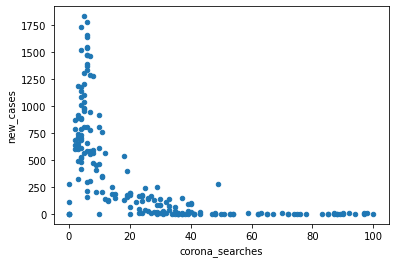

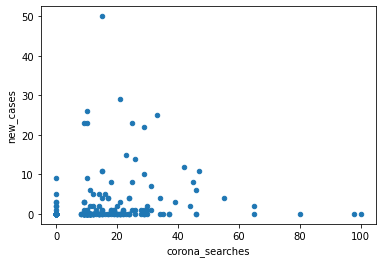

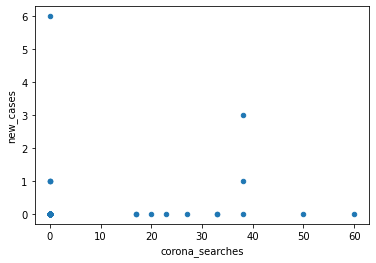

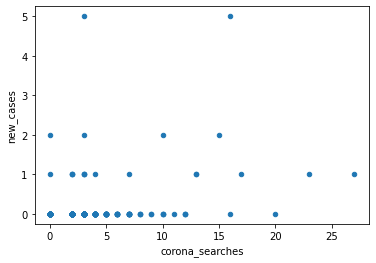

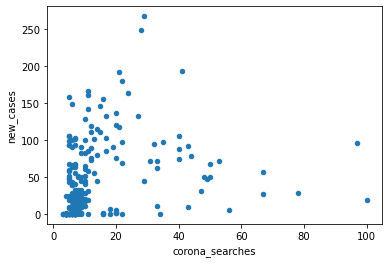

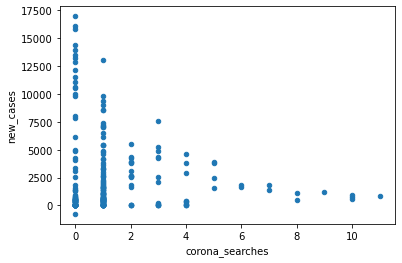

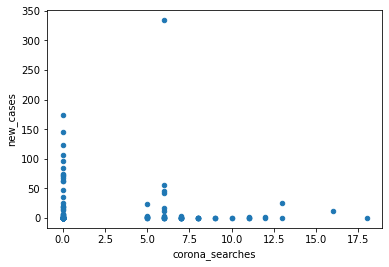

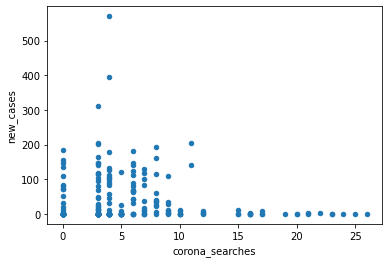

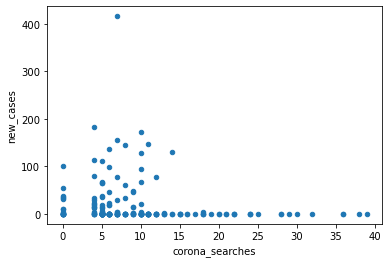

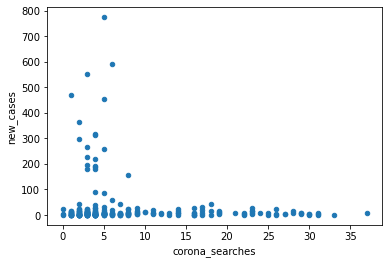

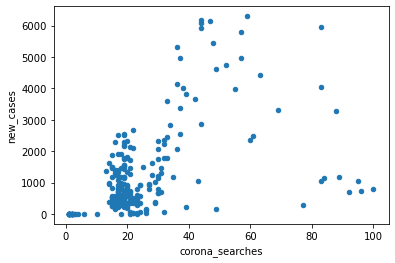

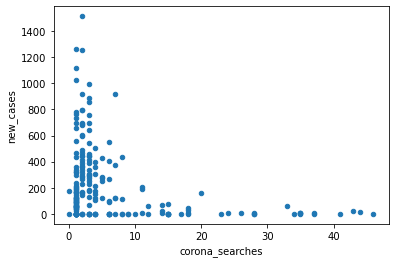

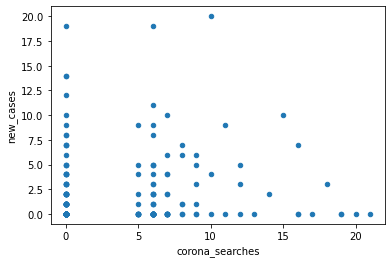

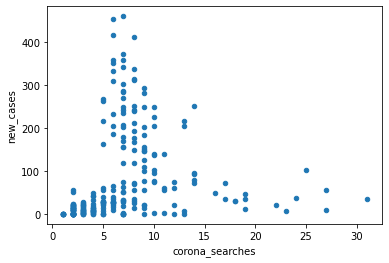

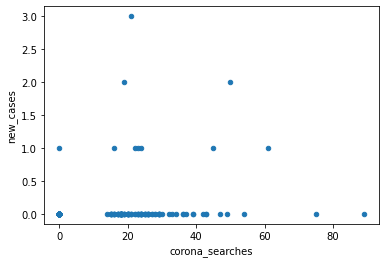

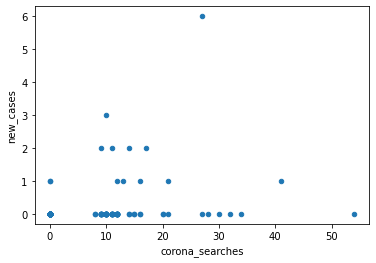

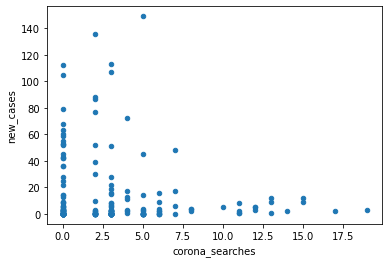

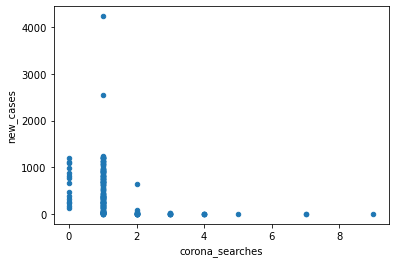

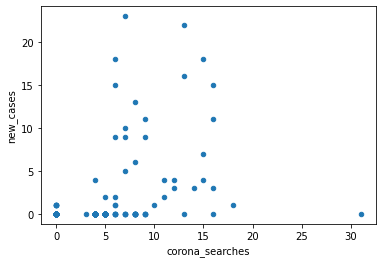

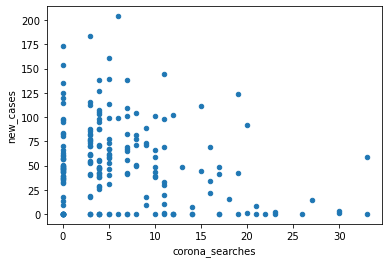

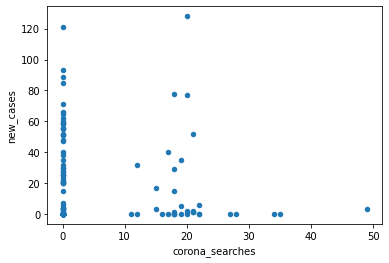

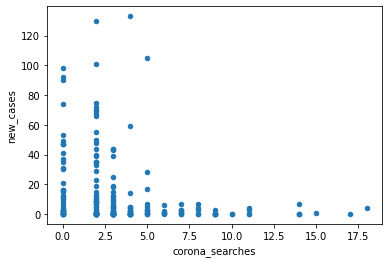

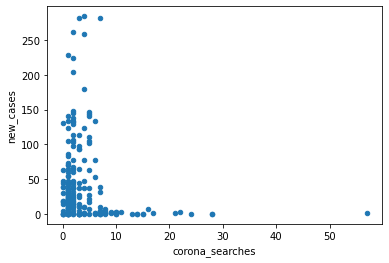

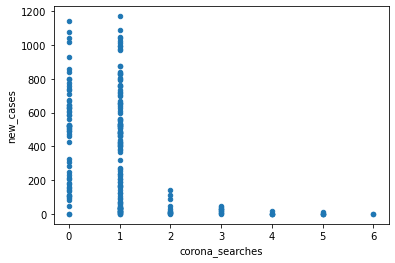

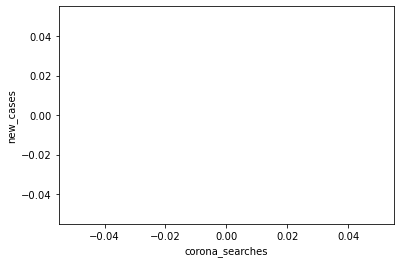

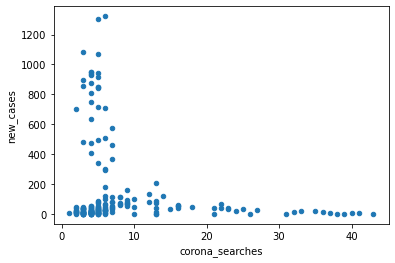

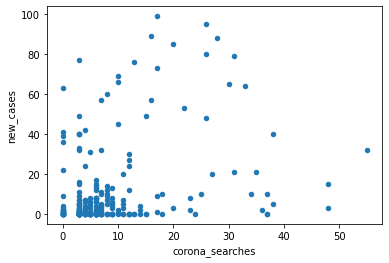

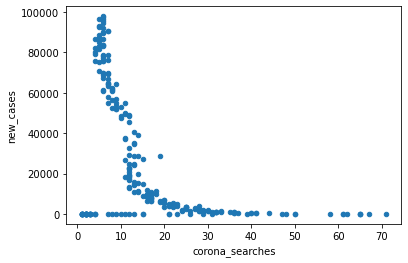

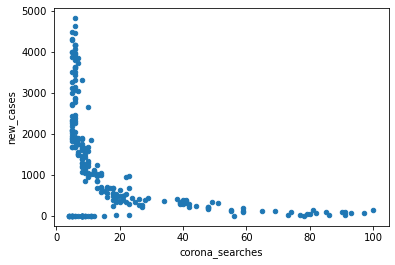

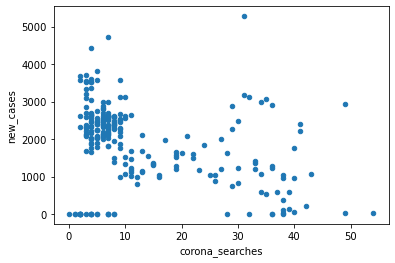

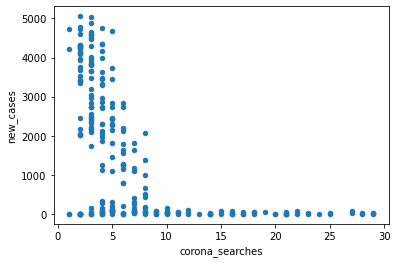

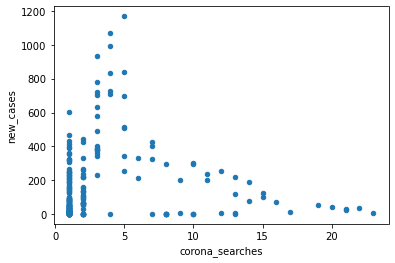

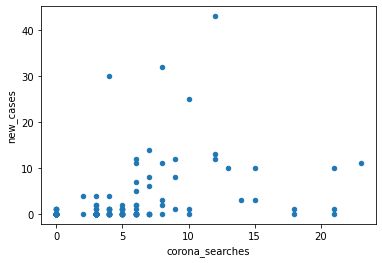

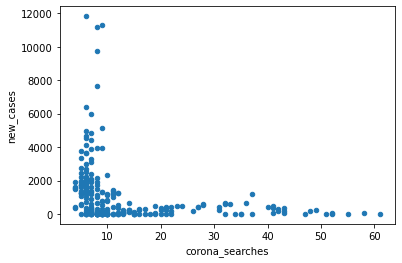

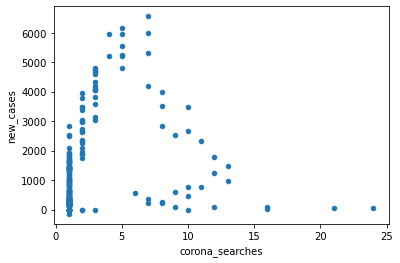

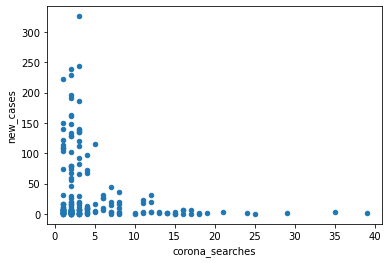

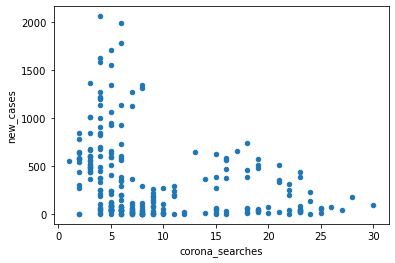

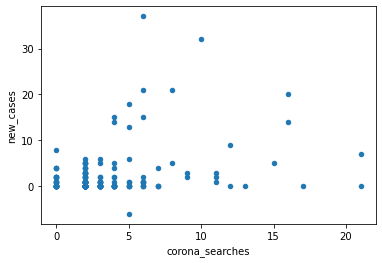

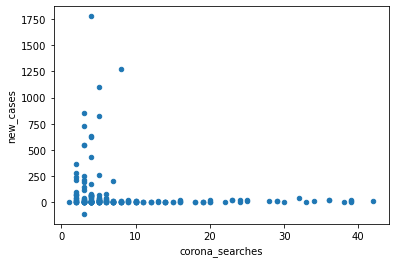

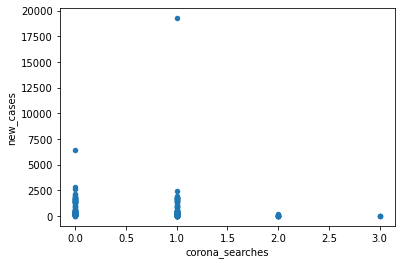

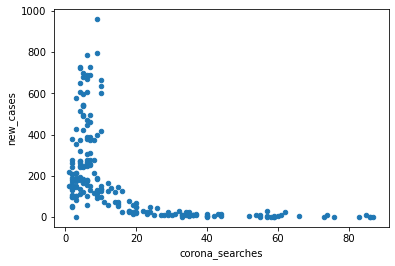

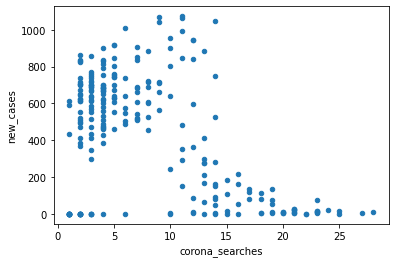

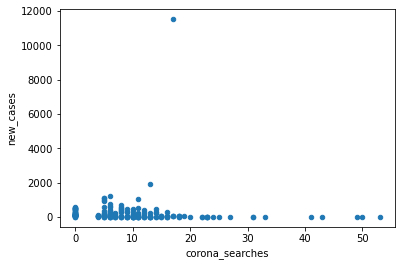

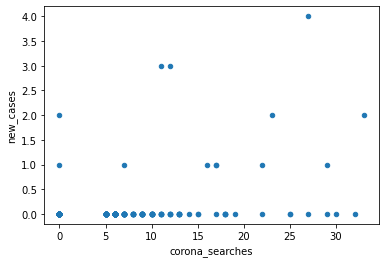

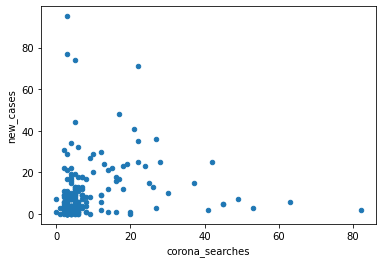

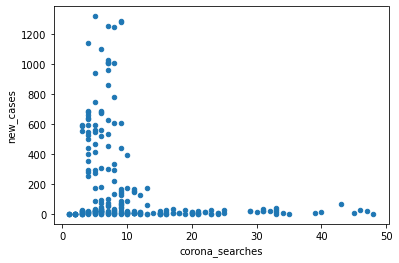

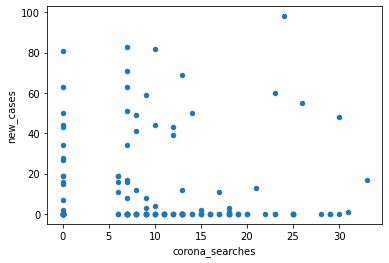

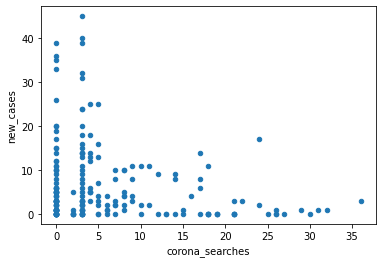

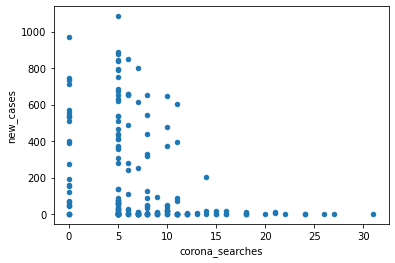

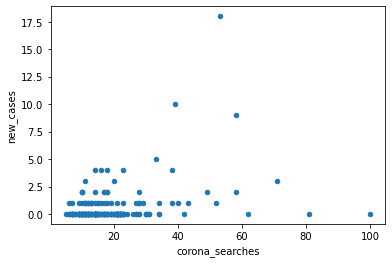

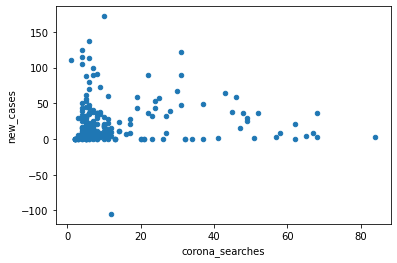

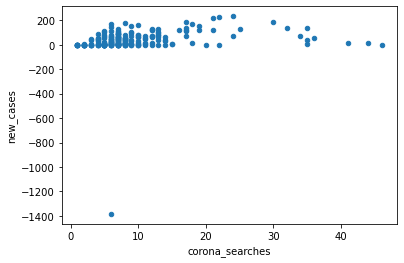

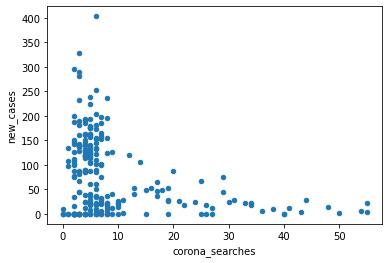

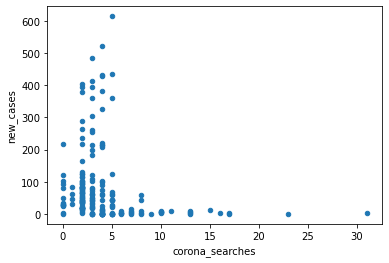

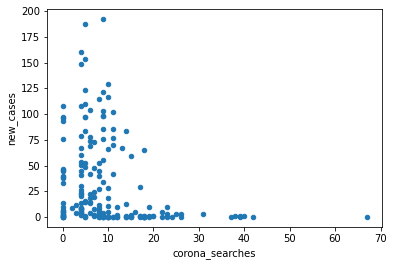

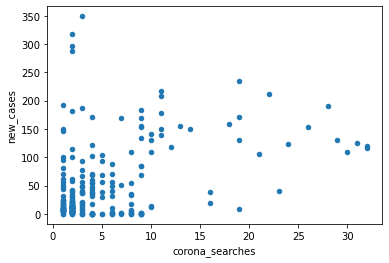

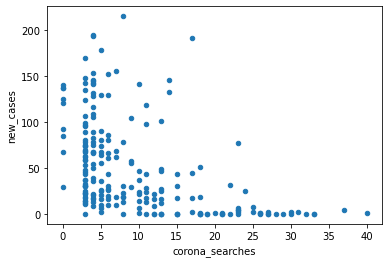

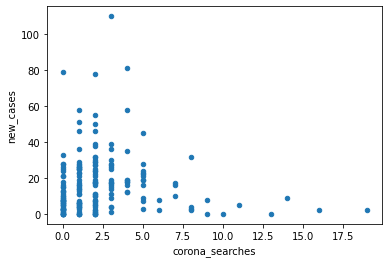

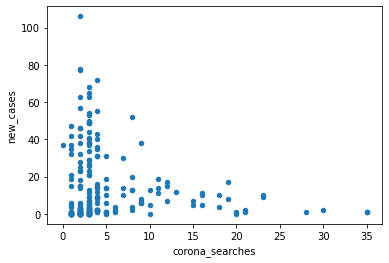

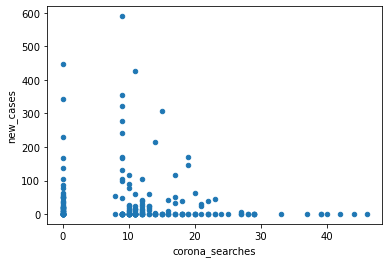

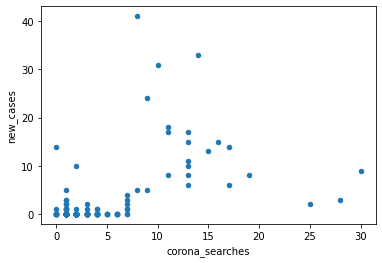

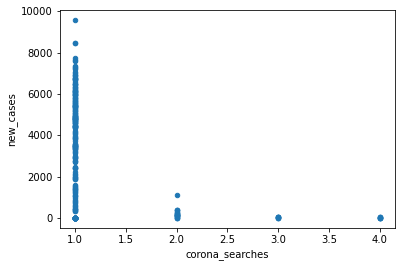

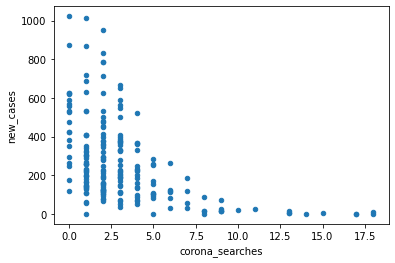

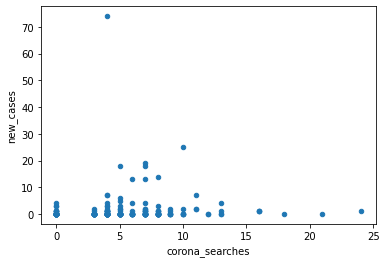

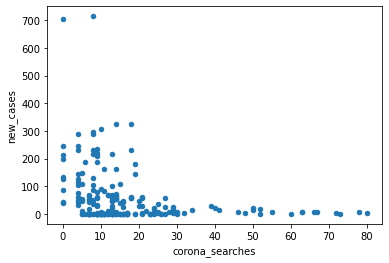

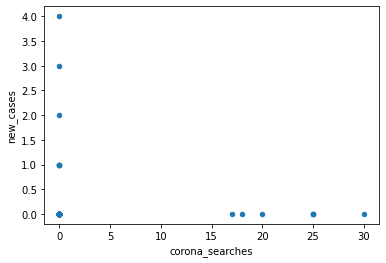

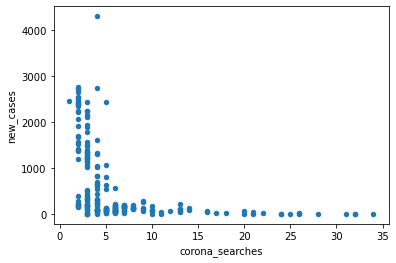

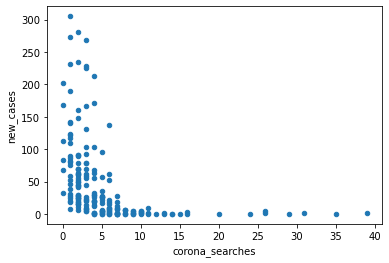

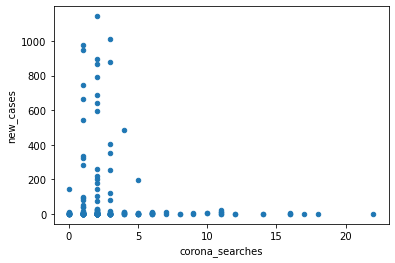

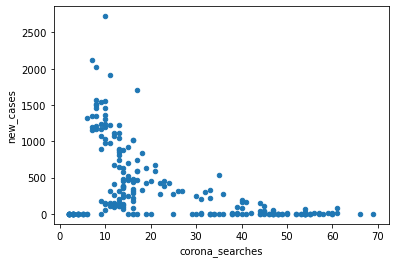

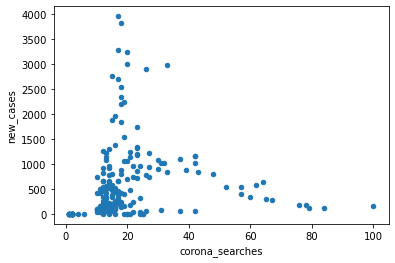

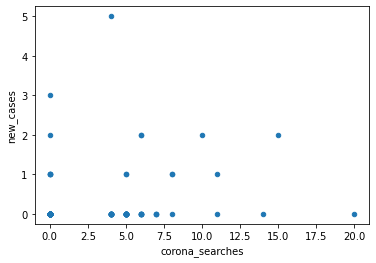

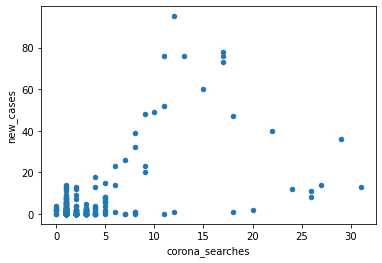

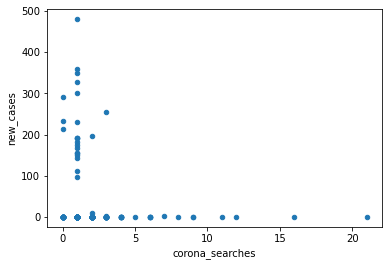

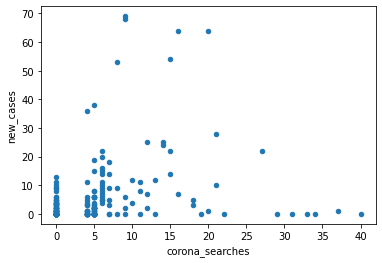

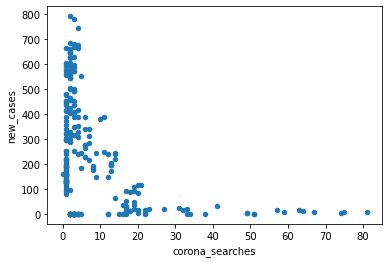

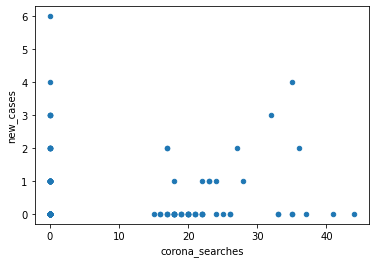

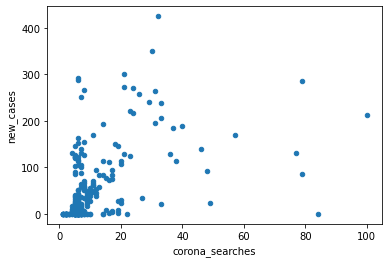

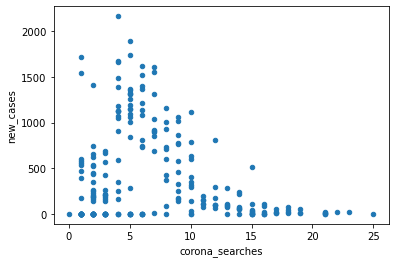

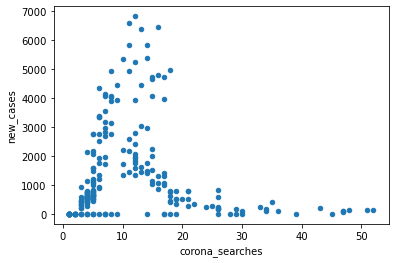

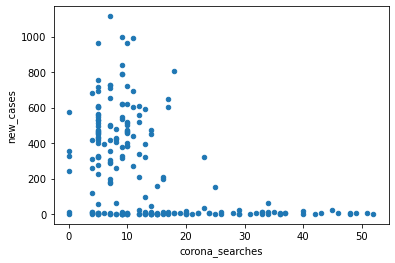

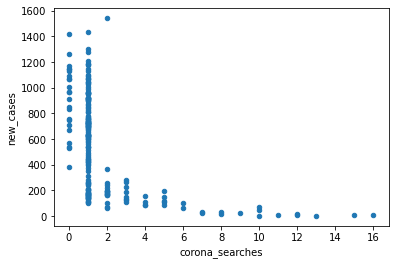

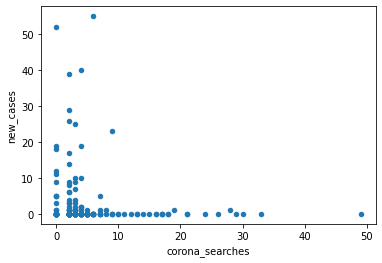

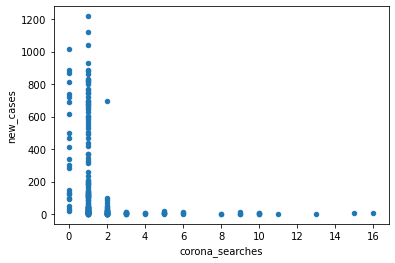

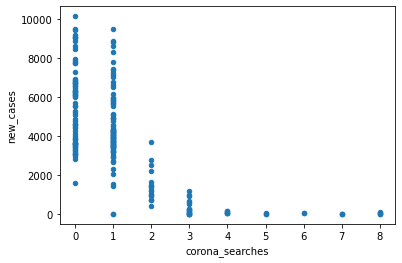

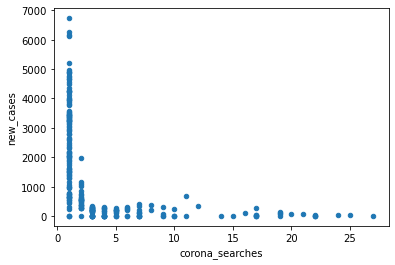

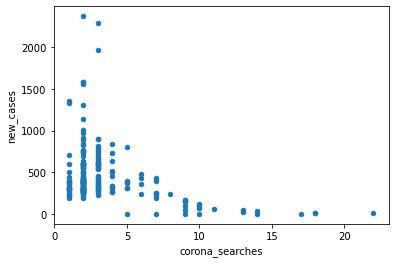

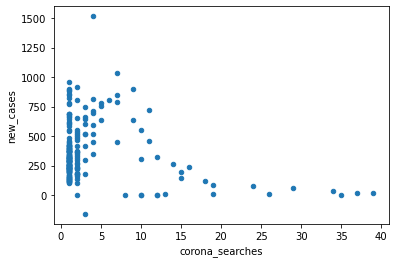

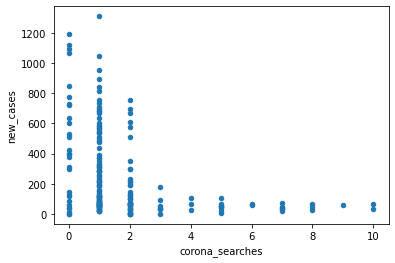

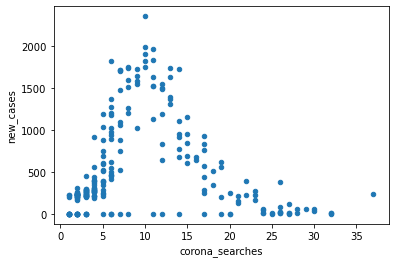

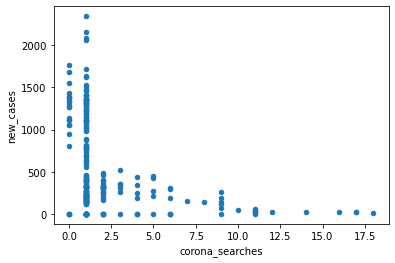

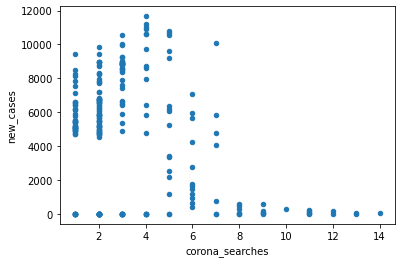

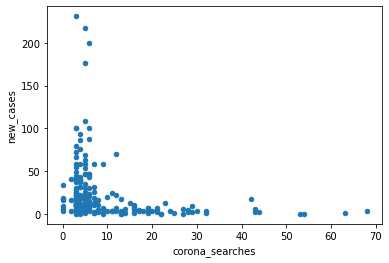

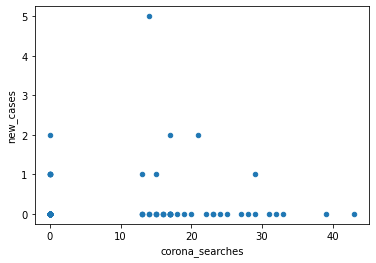

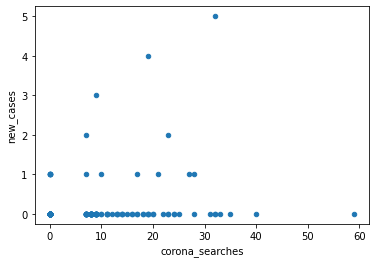

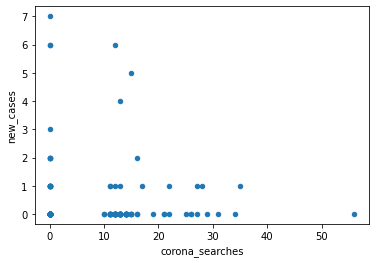

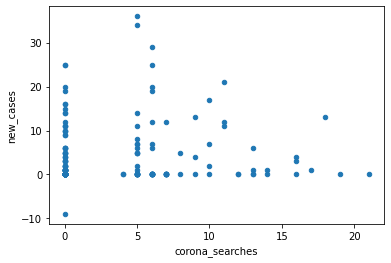

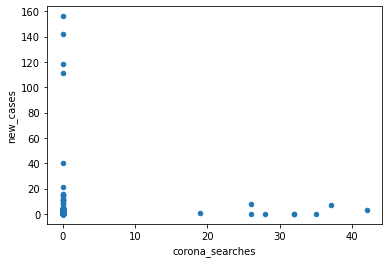

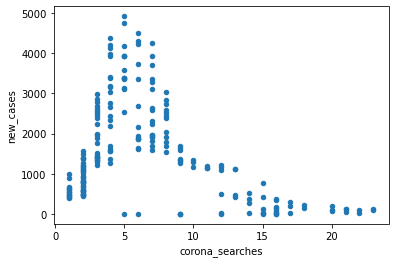

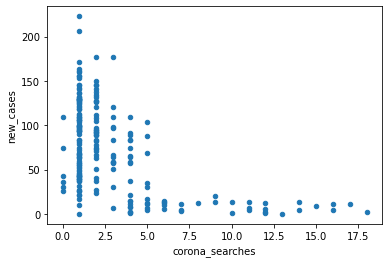

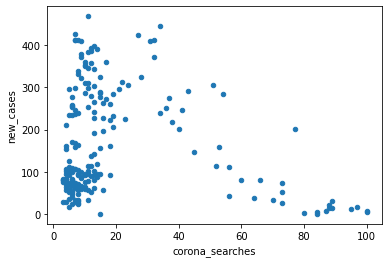

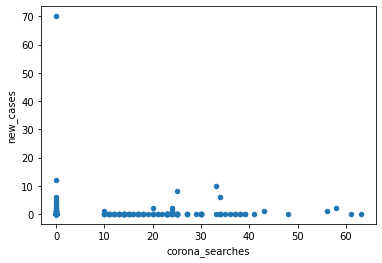

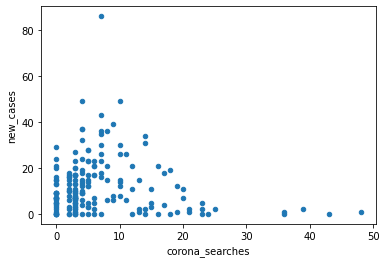

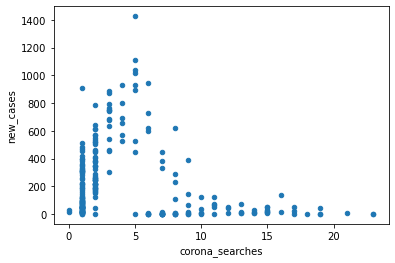

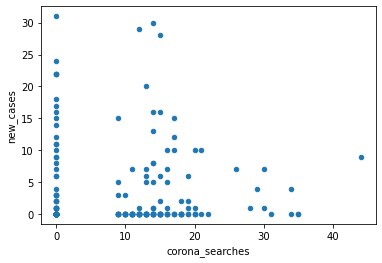

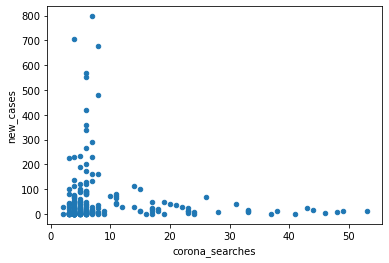

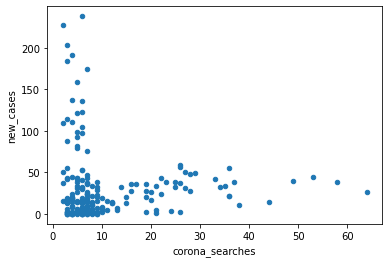

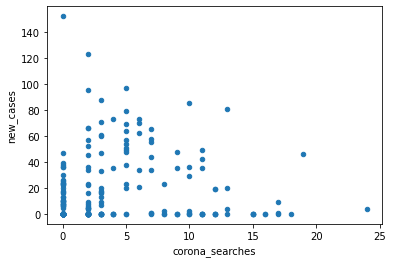

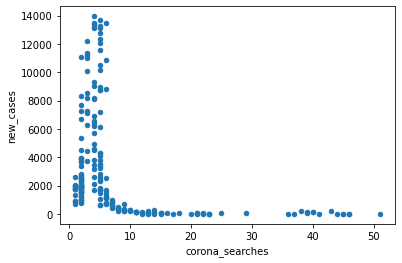

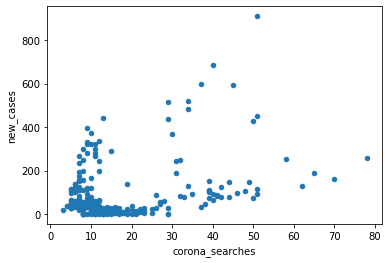

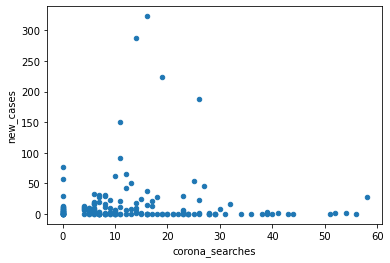

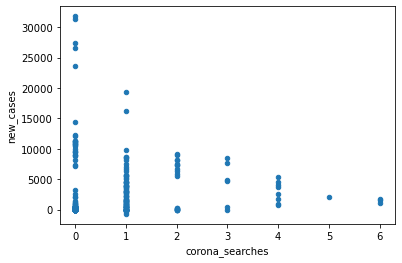

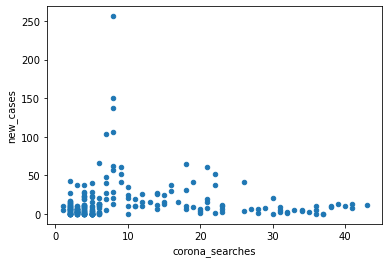

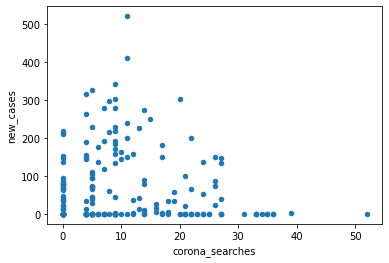

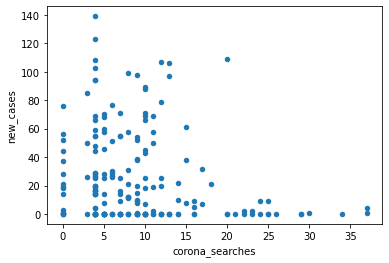

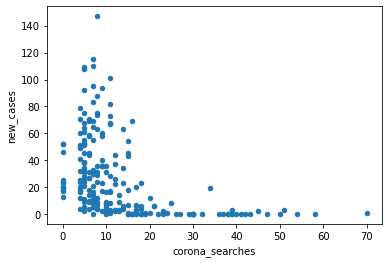

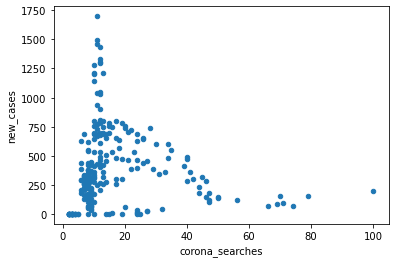

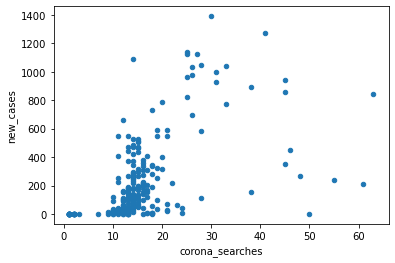

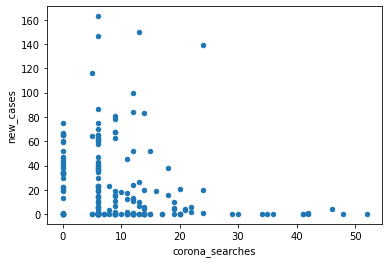

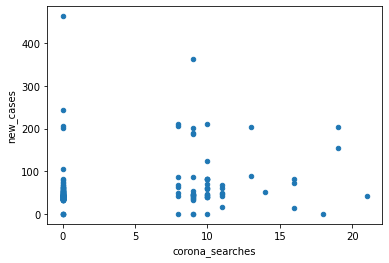

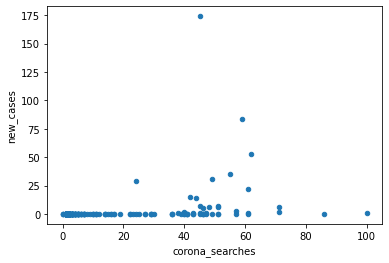

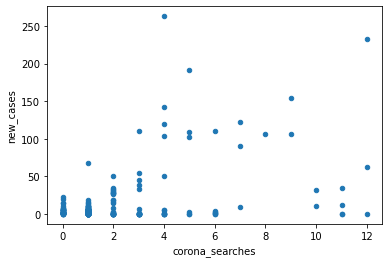

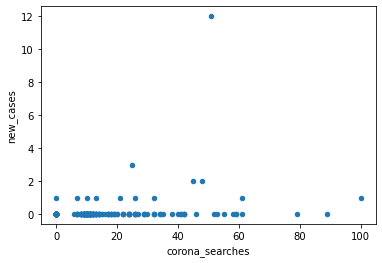

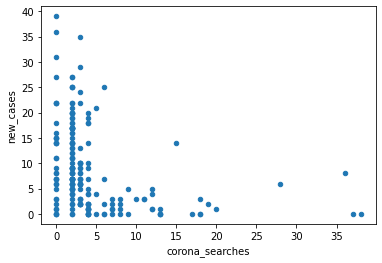

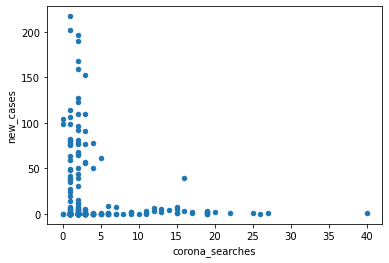

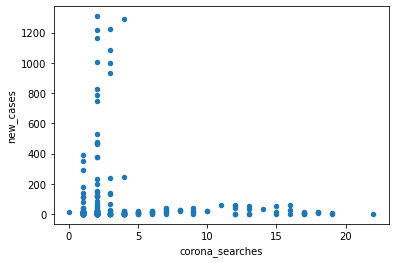

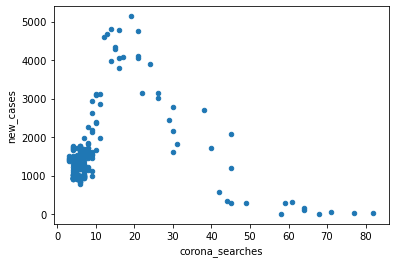

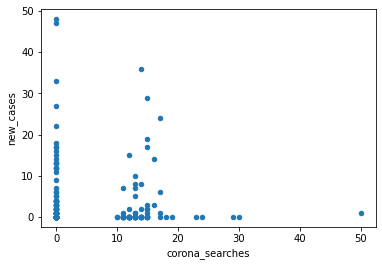

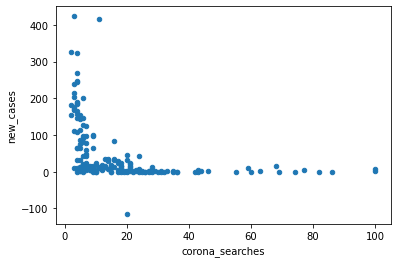

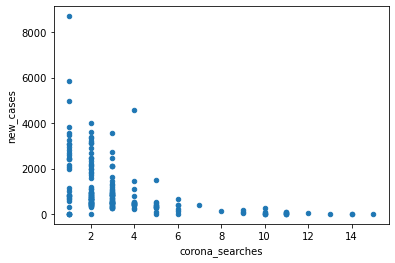

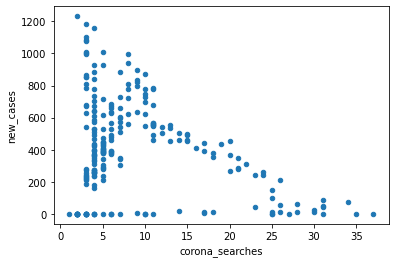

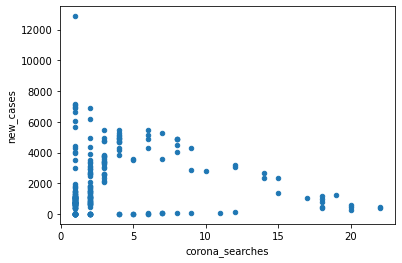

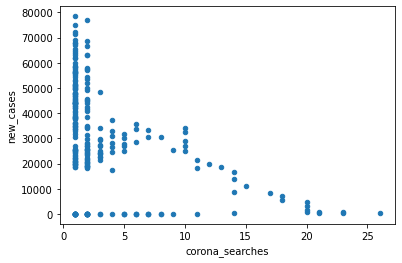

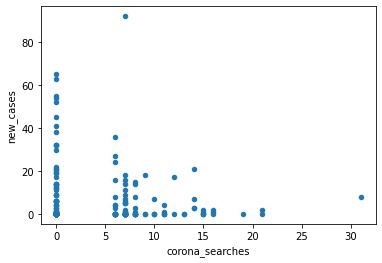

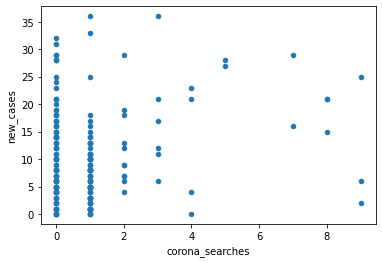

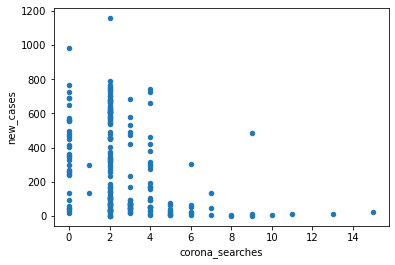

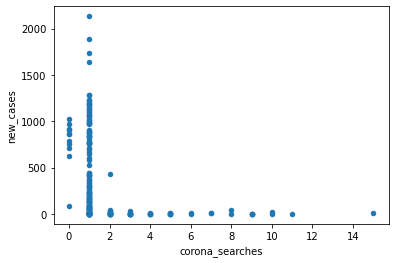

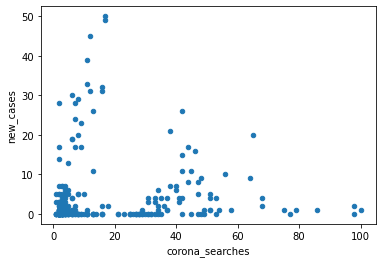

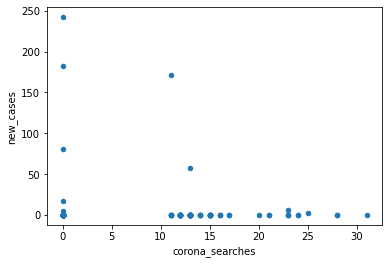

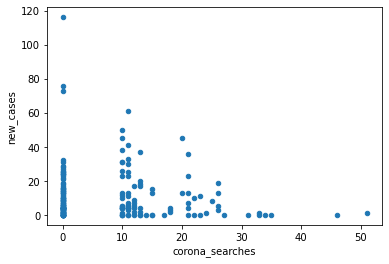

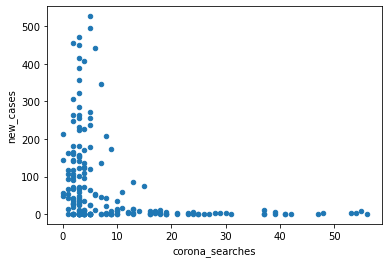

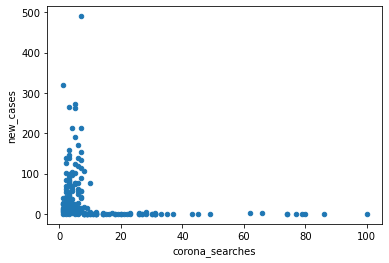

In [107]:
# country_data = combined_data.groupby(by="country_name")
# country_data.plot.scatter(x ="corona_searches" , y = "new_cases")

for i, (continent_name, continent_gdf) in enumerate(country_data):
    # create subplot axes in a 3x3 grid
    ax = plt.scatter("corona_searches","new_cases")
    # plot the continent on these axes
    continent_gdf.plot(ax=ax)
    # set the title
    ax.set_title(country_name)
    # set the aspect
    # adjustable datalim ensure that the plots have the same axes size
    ax.set_aspect('equal', adjustable='datalim')

plt.tight_layout()
plt.show()


Text(0, 0.5, 'searches')

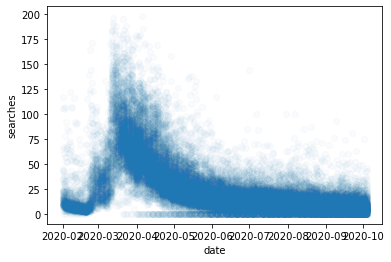

In [108]:
plt.scatter(combined_data["date"],(combined_data["corona_searches"] +  combined_data["corona_virus_searches"]),alpha=0.025)
plt.xlabel("date")
plt.ylabel("searches")

Text(0, 0.5, 'cases')

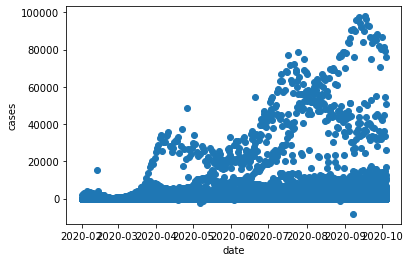

In [69]:
plt.scatter(combined_data["date"],combined_data["new_cases"])
plt.xlabel("date")
plt.ylabel("cases")

In [92]:
country_data = combined_data.groupby(by="country_name")["new_cases"]

searches =  combined_data["corona_searches"] +  combined_data["corona_virus_searches"]

for country, country_cases in country_data:
    print(country)
    
    
    cor = country_cases.corr(searches)
    
    #print(cor)
    
#     if (abs(cor)>0.7):
#         print(country)
#         print(cor)

Bangladesh
-0.7241137466442282
Brunei
0.7448841471736453
Peru
-0.7321189061764946


In [ ]:

plt.scatter(combined_data["corona_searches"] +  combined_data["corona_virus_searches"], combined_data["new_cases"], alpha=0.3)
plt.xlabel("searches")
plt.ylabel("cases")

# Questions for reviewer
** Insert questions for reviewer here